In [2]:
# Importing basic libraries
import openturns as ot
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

# Importing the Likelihood class we made for estimating and computing CIs for quantiles
from likelihood import Likelihood


# 1. Introduction 

In this notebook, we illustrate how to use the class Likelihood that we built for constructing non-asymptotic confidence intervals (CIs) for quantiles with importance sampling. This is a backup to the paper "Non-asymptotic confidence intervals for importance sampling estimation of quantiles" submitted to $\textit{Electronic journal of Statistics}$. 

## 1.1. Main result 

The aforementioned paper proposes to build a CI for a quantile $q_\alpha$ of some probability distribution $\mu$ using a sample from another distribution $\mu_0$ such that $\mu_0\ll \mu$. By making some assumptions on the likelihood $L:=\mu/\mu_0$ between the two measures (such as boundedness of the support, control on second moment, control on the moment generating function,...), we are able to obtain the following inequality

$$\mathbb P\big(q_\alpha \in [Y_{(i_\varepsilon)},Y_{(j_\varepsilon)}]\big) \geq 1 - \exp\left(-\frac{n\nu_+}{c_+^2}h\left(\frac{c_+\varepsilon}{\nu_+}\right) \right)- \exp\left(-\frac{n\nu_-}{c_-^2}h\left(\frac{c_-\varepsilon}{\nu_-}\right) \right),$$

where the CI $[Y_{(i_\varepsilon)},Y_{(j_\varepsilon)}]$ is built using order statistics of the sample $\{Y_1,...,Y_n\}$ coming from $\mu_0$. In addition, the function $h$ is a rate function which depends on the assumptions on $L$. Similarly, the constants $c_\pm$ and $\nu_\pm$ also depend on assumptions on $L$. 

## 1.2. Implementation

In this notebook, we only look at two types of assumptions on the likelihood which are: boundedness ($a\leq L\leq b$) and control on variance ($\mathbb E[L^2]\leq \nu$). This consists in the simplest assumptions and are respectively treated in Proposition 2 and Proposition 3 from the paper.

Since the likelihood plays a central role for obtaining a CI for a quantile on $\mu$, we have created a class `Likelihood` where the objects have the following attributes: $\mu_0$ the instrumental measure, $\mu$ the target measure, the lower and upper bounds on $L$ given by $a$ and $b$, and lastly the variance bound $\nu$.

In [3]:
# Example on how to instantiate an object from the class Likelihood

mu_example = ot.TruncatedDistribution(ot.Normal(0, 1)) # OpenTURNS target distribution
mu0_example = ot.TruncatedDistribution(ot.Gumbel(0, 1))   # OpenTURNS instrumental distribution

# Need to compute the bounds a, b and nu either analytically or using a numerical method

lowerBound = 0
upperBound = np.sqrt(2/np.pi) * np.exp(1)
varianceBound = 3

L = Likelihood(mu, mu0, lowerBound, upperBound, varianceBound)

NameError: name 'ot' is not defined

Note that the bounds ($a$, $b$ and $\nu$) should be known before instantiating an object from the class `Likelihood`. They can be computed by using numerical tools from `scipy` for instance.

# 2. Application to a toy case

Here we look at 

In [12]:
# Example on how to instantiate an object from the class Likelihood

mu = ot.Normal(0, 1) # OpenTURNS target distribution
mu0 = ot.Laplace(0, 1)   # OpenTURNS instrumental distribution

# Need to compute the bounds a, b and nu either analytically or using a numerical method

lowerBound = 0
upperBound = np.sqrt(2/np.pi) * np.exp(1/2)
varianceBound = 2*np.exp(1/4) * (1 - ot.Normal(0,1).computeCDF(-np.sqrt(2)/2))/np.sqrt(np.pi)
# revoir variance bound calcul 

L = Likelihood(mu, mu0, lowerBound, upperBound, varianceBound)

print(f"support = [{lowerBound},{upperBound}]")
print(f"Exact variance = {varianceBound}")

support = [0,1.315489246958914]
Exact variance = 1.1015014513270007


In [11]:
def l(x):
    return -mu.computePDF(x)/mu0.computePDF(x)

print(upperBound)
scp.optimize.minimize(l, x0=3)

2.168875102838455


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.3154892469589108
        x: [ 1.000e+00]
      nit: 4
      jac: [ 8.941e-08]
 hess_inv: [[ 7.603e-01]]
     nfev: 16
     njev: 8

In [ ]:
n_MC = 100000
np.sum([L.likelihoodRatioFunction(y_i)**2 for y_i in L.sampleInstrumentalDistribution(n_MC)])/n_MC

np.float64(1.101646899679834)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_116568/2839360753.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax[0].plot(y_range, mu_range, color ='Green', label = "$d\mu$ density")
/tmp/ipykernel_116568/2839360753.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax[0].plot(y_range, mu0_range, color ='Red', label = "$d\mu_0$ density")


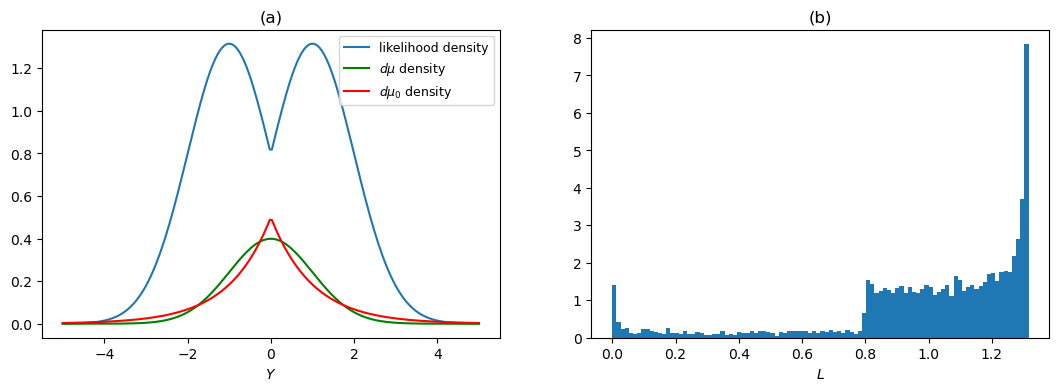

In [3]:
y_range = np.linspace(-5, 5, 200)
l_range = [L.likelihoodRatioFunction(y) for y in y_range]
mu_range = [mu.computePDF(y) for y in y_range]
mu0_range = [mu0.computePDF(y) for y in y_range]

likelihood_hist = [L.likelihoodRatioFunction(y) for y in L.sampleInstrumentalDistribution(5000)]

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
fig.figsize=(10,5)
ax[0].plot(y_range, l_range, label ='likelihood density')
ax[0].plot(y_range, mu_range, color ='Green', label = "$d\mu$ density")
ax[0].plot(y_range, mu0_range, color ='Red', label = "$d\mu_0$ density")
ax[0].set_xlabel("$Y$")
ax[0].set_title("(a)")
ax[0].legend(fontsize = 9)

ax[1].hist(likelihood_hist, bins = 100, density=True);
ax[1].set_xlabel("$L$")
ax[1].set_title("(b)")

fig.savefig("figures/likelihood density and histogram.png", dpi=600, bbox_inches='tight')


In [ ]:
print([mu.computeQuantile(alpha) for alpha in Alpha]
)

[class=Point name=Unnamed dimension=1 values=[0], class=Point name=Unnamed dimension=1 values=[0.67449], class=Point name=Unnamed dimension=1 values=[1.64485]]


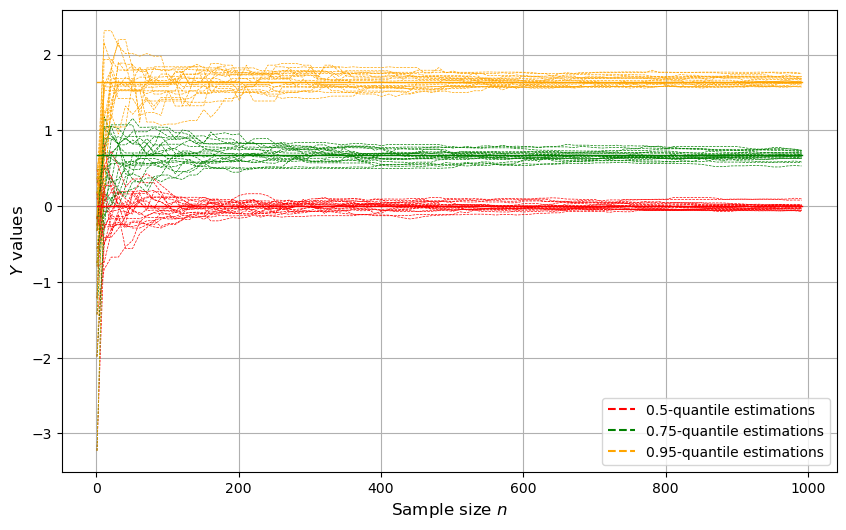

In [4]:
N = np.arange(1, 1000, 10)
Alpha = [0.5, 0.75, 0.95]

true_values = [mu.computeQuantile(alpha) for alpha in Alpha]

quantilesForAlphaAndN = np.zeros((len(Alpha),len(N)))

plt.figure(figsize=(10,6))
colors = ['red', 'green', 'orange']

for counter in range(20):
    Y_sample = L.sampleInstrumentalDistribution(1000)
    i = 0
    for n in N:
        quantilesForAlphaAndN[:,i] = L.empiricalWeightedQuantile(Y_sample[:n], Alpha)
        i += 1

    for i in range(3):
        plt.plot(N, quantilesForAlphaAndN[i], color=colors[i], linestyle='--', linewidth=0.5, label='_nolegend_')



for i in range(3):
    plt.plot(N, np.ones(len(N))*true_values[i], color=colors[i], linewidth = 1)
    plt.plot([], [], color=colors[i], linestyle='--', label=f'{Alpha[i]}-quantile estimations')

plt.legend()
plt.xlabel("Sample size $n$",fontsize="12")
plt.ylabel("$Y$ values",fontsize="12")
plt.grid(True)
plt.style.use('seaborn-v0_8-notebook')
#plt.savefig("figures/myplot.png", dpi=600, bbox_inches='tight')
plt.show()



In [5]:
intervalType = "two-sided" 
#CiBoundType = "B"

CiBoundTypes = ["Hoeffding", "Bennett"]
beta = 0.95

Alpha = [0.5, 0.75, 0.95]

Y_sample = L.sampleInstrumentalDistribution(5000)

for CiBoundType in CiBoundTypes:
    print([L.empiricalWeightedQuantile(Y_sample, alpha) for alpha in Alpha])
    #for  in CiBoundTypes: 
    print(f"{CiBoundType}'s confidence intervals:")
    for alpha in Alpha:
        CI = L.computeCI(Y_sample, alpha, beta, intervalType, CiBoundType)

        print(f"for {alpha}-quantile of mu: [{CI[0]},{CI[1]}] with confidence {100*CI[2]}%")
    print("-------------------------------------------------------------------------------")

[np.float64(0.010502144184410023), np.float64(0.6620643043927227), np.float64(1.6730463262771669)]
Hoeffding's confidence intervals:
1.1760048029281296
1.1760048029281296


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

0.011760048029281317
4.245377338570548
4.704019211721928e-12
3.8102640287264244
2.9422468409836255e-05
3.831461114281107
0.0032414805456110994
4.035765971722593
0.006837450611637589
4.139908341470762
0.009132920901507299
4.192477011601702
0.010405027360656268
4.218885717981387
0.011072173418784281
4.232121163999783
0.010645984401513856
4.22371128397041
0.01085803338772367
4.227915178462672
0.010964842022647626
4.230017909850621
0.010915842921729993
4.229054481777085
0.010923436010270843
4.22920391246552
0.010924465271172695
4.229224164350112
0.010924460335476305
4.229224067236805
0.010924460351183348
4.229224067545853
0.010924460351636732
4.229224067554773
0.0018090538534057193
0.010924460351183348
4.229224067545853
0.03542990383970748
0.011760048029281317
4.245377338570548
4.704019211721928e-12
3.8102640287264244
2.9422468409836255e-05
3.831461114281107
0.0032414805456110994
4.035765971722593
0.006837450611637589
4.139908341470762
0.009132920901507299
4.192477011601702
0.0104050273606

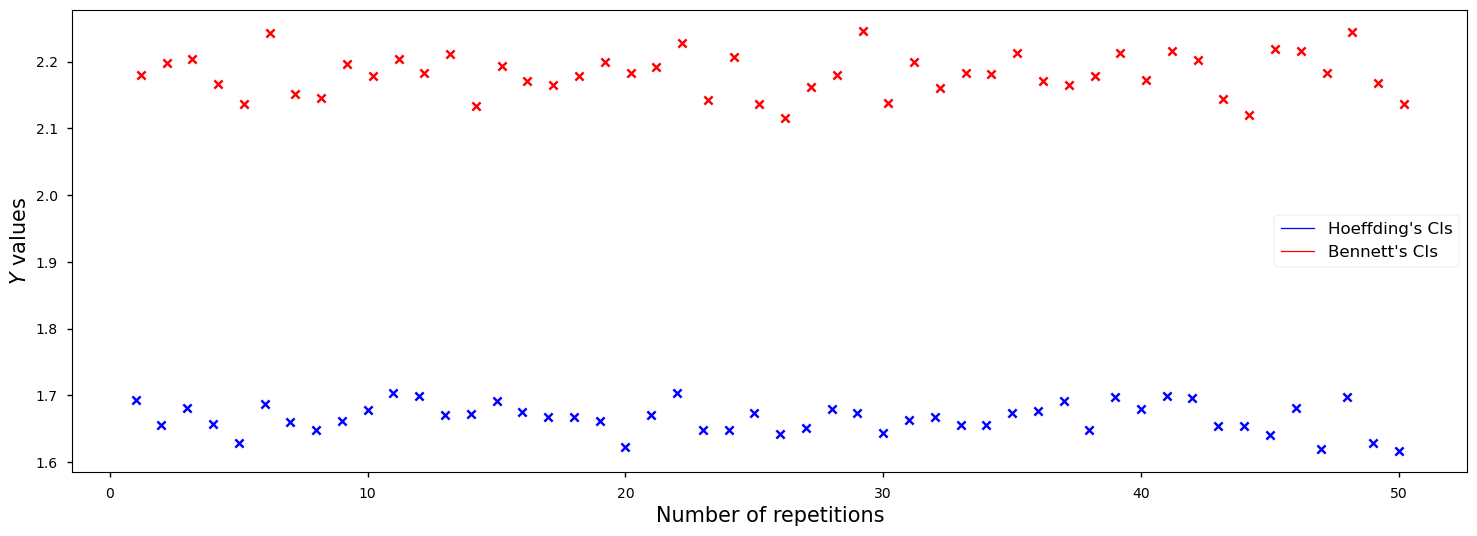

In [6]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-v0_8-notebook')
#plt.grid(True)
plt.xlabel("Number of repetitions",fontsize="15")
plt.ylabel("$Y$ values",fontsize="15")

intervalType = "right bound"
n=5000
Y_sample = L.sampleInstrumentalDistribution(n)
Alpha = [0.95]
for alpha in Alpha:  
    #true_val = mu.computeQuantile(alpha)
    #plt.plot([0,21], [true_val, true_val]) 

    for i in range(1, 51):
        Y_sample = L.sampleInstrumentalDistribution(5000)
        #q = L.empiricalWeightedQuantile(Y_sample, alpha)
        CI = L.computeCI(Y_sample, alpha, beta, intervalType=intervalType)
        CI_B = L.computeCI(Y_sample, Alpha[0], beta, CiBoundType="Bennett", intervalType=intervalType)
        #print(CI[0])
        plt.plot([i, i],[CI[0], CI[1]], color = 'Blue', linewidth = 0.9, label = "_nolegend_")
        plt.plot([i+0.2, i+0.2],[CI_B[0], CI_B[1]], color = 'Red', linewidth = 0.7,  label = "_nolegend_")
        #plt.scatter([i+0.1],[q], color='green', marker = 'x', label = "_nolegend")
        #plt.scatter([i+0.1], [true_val], color='Purple', marker ='x', label ="_nolegend_" )
        plt.scatter([i, i],[CI[0], CI[1]], color ='Blue', s=35, marker= 'x', label = "_nolegend_")
        plt.scatter([i+0.2, i +0.2],[CI_B[0], CI_B[1]], color ='Red', s=35, marker= 'x', label = "_nolegend_")

plt.plot([], [], color = 'Blue', linewidth = 0.9, label = "Hoeffding's CIs")
plt.plot([], [], color = 'Red', linewidth = 0.9, label = "Bennett's CIs")
#plt.scatter([], [], color='green', marker = 'x', label = "estimation")
#plt.scatter([], [], color ='Purple', marker= 'x', label = "true value")
plt.savefig("figures/repeated H and B CIs median.png", dpi=600, bbox_inches='tight')

plt.legend(fontsize = 12)

0.011760048029281317
4.245377338570548
4.704019211721928e-12
3.8102640287264244
6.961030251212645e-06
3.820562678677054
0.0030848099893229027
4.030171314083357
0.00019196853561994736
3.864538164349838
0.0012039628914638993
3.9469203128455903
0.0010985297547273295
3.940747740350451
0.0011474824370501107
3.943648290908404
0.001148881336958229
3.943730275579971
0.0011488798201992494
3.9437301867145647
0.0011488798212694732
3.9437301867772683
0.0011488798214165036
3.9437301867858823
0.034372023214698566
0.0011488798212694732
3.9437301867772683
0.039354179076765396
0.011760048029281317
4.245377338570548
4.704019211721928e-12
3.8102640287264244
6.961030251212645e-06
3.820562678677054
0.0030848099893229027
4.030171314083357
0.00019196853561994736
3.864538164349838
0.0012039628914638993
3.9469203128455903
0.0010985297547273295
3.940747740350451
0.0011474824370501107
3.943648290908404
0.001148881336958229
3.943730275579971
0.0011488798201992494
3.9437301867145647
0.0011488798212694732
3.9437301

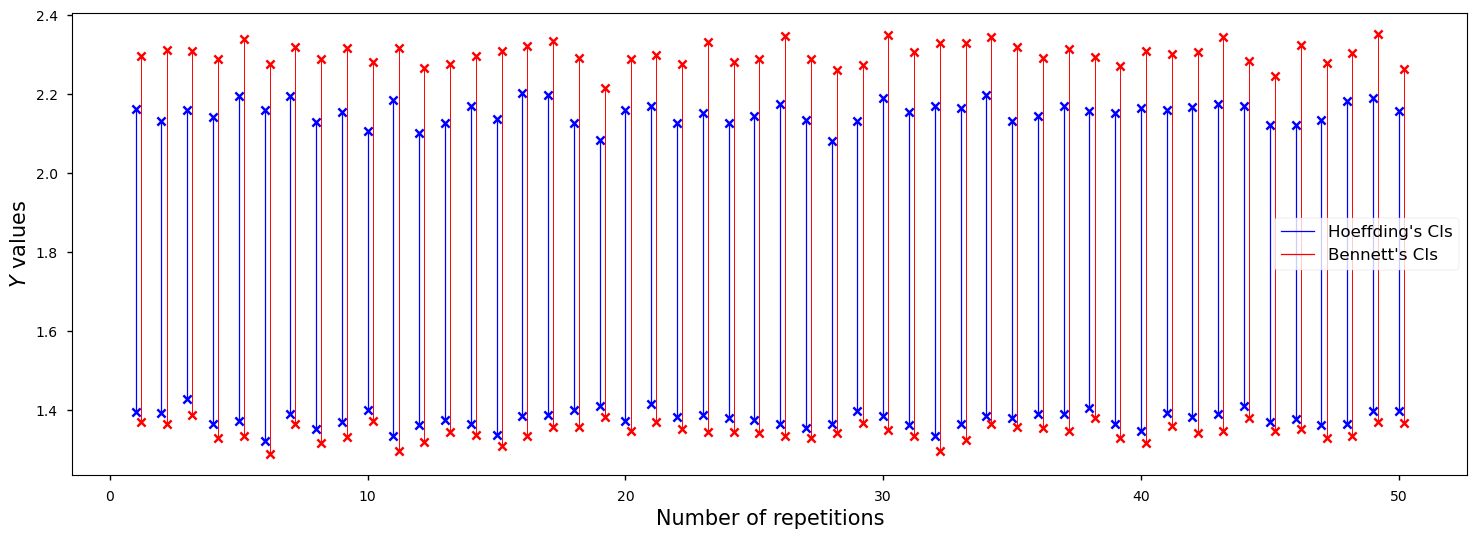

In [8]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-v0_8-notebook')
#plt.grid(True)
plt.xlabel("Number of repetitions",fontsize="15")
plt.ylabel("$Y$ values",fontsize="15")

n=10000
Y_sample = L.sampleInstrumentalDistribution(n)
Alpha = [0.95]
for alpha in Alpha:  
    #true_val = mu.computeQuantile(alpha)
    #plt.plot([0,21], [true_val, true_val]) 

    for i in range(1, 51):
        Y_sample = L.sampleInstrumentalDistribution(5000)
        #q = L.empiricalWeightedQuantile(Y_sample, alpha)
        CI = L.computeCI(Y_sample, alpha, beta)
        CI_B = L.computeCI(Y_sample, Alpha[0], beta, intervalType="two-sided", CiBoundType="Bennett")
        #print(CI[0])
        plt.plot([i, i],[CI[0], CI[1]], color = 'Blue', linewidth = 0.9, label = "_nolegend_")
        plt.plot([i+0.2, i+0.2],[CI_B[0], CI_B[1]], color = 'Red', linewidth = 0.7,  label = "_nolegend_")
        #plt.scatter([i+0.1],[q], color='green', marker = 'x', label = "_nolegend")
        #plt.scatter([i+0.1], [true_val], color='Purple', marker ='x', label ="_nolegend_" )
        plt.scatter([i, i],[CI[0], CI[1]], color ='Blue', s=35, marker= 'x', label = "_nolegend_")
        plt.scatter([i+0.2, i +0.2],[CI_B[0], CI_B[1]], color ='Red', s=35, marker= 'x', label = "_nolegend_")

plt.plot([], [], color = 'Blue', linewidth = 0.9, label = "Hoeffding's CIs")
plt.plot([], [], color = 'Red', linewidth = 0.9, label = "Bennett's CIs")
#plt.scatter([], [], color='green', marker = 'x', label = "estimation")
#plt.scatter([], [], color ='Purple', marker= 'x', label = "true value")
plt.savefig("figures/repeated H and B CIs 0.95.png", dpi=600, bbox_inches='tight')

plt.legend(fontsize = 12)

1+u = 1.0
log(1+u) = 0.0
1+u = 1.0080567712380477
log(1+u) = 0.008024488735893716
1+u = 1.0159755786632951
log(1+u) = 0.01584931211867761
1+u = 1.023752383803949
log(1+u) = 0.02347468468445712
1+u = 1.0313831731258207
log(1+u) = 0.03090078790576807
1+u = 1.0388639626365388
log(1+u) = 0.0381277724924549
1+u = 1.0461908025485966
log(1+u) = 0.04515576062209268
1+u = 1.0533597819926401
log(1+u) = 0.05198484810215684
1+u = 1.0603670337719944
log(1+u) = 0.05861510646588009
1+u = 1.0672087391490512
log(1+u) = 0.06504658500350033
1+u = 1.0738811326537825
log(1+u) = 0.07127931273038125
1+u = 1.0803805069043038
log(1+u) = 0.07731330029327435
1+u = 1.0867032174291251
log(1+u) = 0.08314854181581413
1+u = 1.0928456874804333
log(1+u) = 0.0887850166841462
1+u = 1.0988044128275247
log(1+u) = 0.09422269127344088
1+u = 1.1045759665192922
log(1+u) = 0.09946152061588677
1+u = 1.1101570036045056
log(1+u) = 0.10450145001062978
1+u = 1.1155442657984902
log(1+u) = 0.10934241657599499
1+u = 1.1207345860847258


(0.0, 1.0)

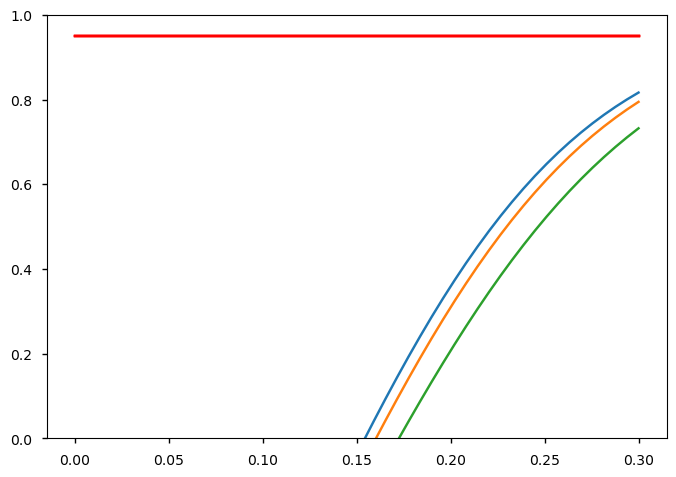

In [30]:
n = 50

def P(epsilon, alpha, n):
    return L.BennettProbabilityBound(n, alpha, epsilon)

for alpha in [0.5, 0.75, 0.95]:
    X = np.linspace(0, 0.3, 50)
    plt.plot(X, [P(eps, alpha, n) for eps in X])

    plt.plot([0,0.3],[0.95, 0.95], 'Red')
plt.ylim(0,1)